# Simulazione Monte Carlo

Call option BS 32.90251071367952
Put option BS 4.782233968919449
Call option Monte Carlo 32.55767709443451
Put option Monte Carlo 4.582051110647698


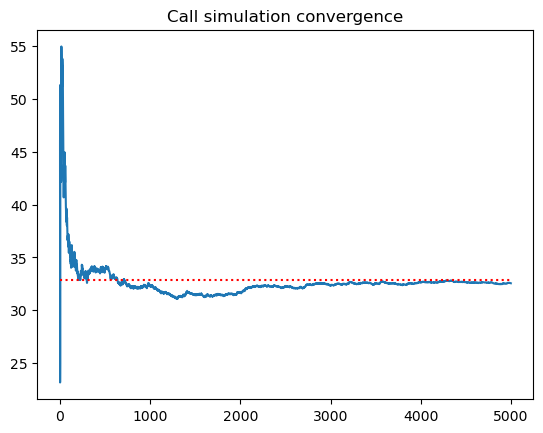

In [2]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def BS(S0,K,T,sigma,r):
    d1 = (np.log(S0/K)+(r+sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - (sigma*np.sqrt(T))
    c = S0*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    p = K*np.exp(-r*T)*norm.cdf(-d2) - S0*norm.cdf(-d1)
    return c, p


# BS price
S0 = 120
K = 110
r = 0.09
sigma = 0.25
T = 2

c, p = BS(S0,K,T,sigma,r)
print('Call option BS', c)
print('Put option BS', p)
# for each simulation compute payoff
N = 5000
payoff = np.zeros((N,2))
option = np.zeros((N,2))
for i in range(N):
    S = S0*np.exp((r-sigma**2/2)*T+sigma*np.random.normal()*np.sqrt(T))
    payoff[i,0] = max(S-K,0) # call
    payoff[i,1] = max(K-S,0) # put
    option[i] = payoff[:i+1].mean(axis=0)*np.exp(-r*T)

print('Call option Monte Carlo', option[-1,0])
print('Put option Monte Carlo', option[-1,1])

plt.plot(option[:,0])
plt.hlines(c, xmin=0, xmax=N, colors='r', linestyle=':')
plt.title('Call simulation convergence');

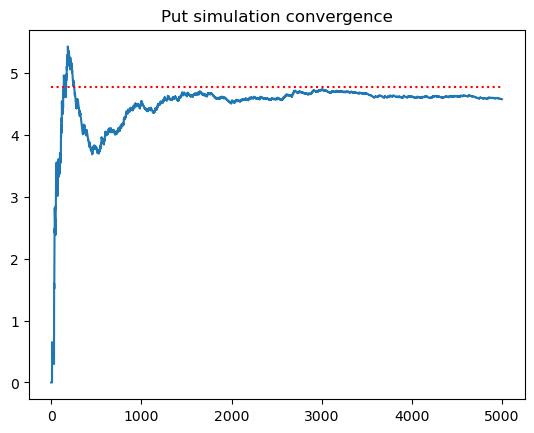

In [3]:
plt.plot(option[:,1])
plt.hlines(p, xmin=0, xmax=N, colors='r', linestyle=':')
plt.title('Put simulation convergence');